<a href="https://colab.research.google.com/github/Musaddiq98/Data-Science-Assignments/blob/main/Text_Mining_Product_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting reviews of any product from ecommerce website like amazon

**Here we are Webscraping Using BeautifulSoup**

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [ ]:
url="https://www.amazon.in/boAt-Bluetooth-Speaker-Battery-Feature/product-reviews/B09TRW4619/ref=cm_cr_othr_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"
code = requests.get(url)
code

<Response [200]>

In [ ]:
soup = BeautifulSoup(code.content,'html.parser')
print(soup.prettify())

<!DOCTYPE doctype html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in">
 <!-- sp:feature:head-start -->
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <!-- sp:end-feature:head-start -->
  <!-- sp:feature:csm:head-open-part1 -->
  <!-- sp:end-feature:csm:head-open-part1 -->
  <!-- sp:feature:cs-optimization -->
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
  <link href="https://m.media-amazon.com" rel="dns-prefetch"/>
  <link href="https://completion.amazon.com" rel="dns-prefetch"/>
  <!-- sp:end-feature:cs-optimization -->
  <!-- sp:feature:csm:head-open-part2 -->
  <!-- sp:end-feature:csm:head-open-part2 -->
  <!-- sp:feature:aui-assets -->
  <link href="https://m.media-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,41tGz3DNCrL.css,31ufSReDtSL.css,013z33uKh2L.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,

In [ ]:
star_rating = soup.select('i.review-rating span.a-icon-alt')[2:]
star_rating

[<span class="a-icon-alt">4.0 out of 5 stars</span>,
 <span class="a-icon-alt">5.0 out of 5 stars</span>,
 <span class="a-icon-alt">4.0 out of 5 stars</span>,
 <span class="a-icon-alt">4.0 out of 5 stars</span>,
 <span class="a-icon-alt">4.0 out of 5 stars</span>,
 <span class="a-icon-alt">4.0 out of 5 stars</span>,
 <span class="a-icon-alt">4.0 out of 5 stars</span>,
 <span class="a-icon-alt">5.0 out of 5 stars</span>,
 <span class="a-icon-alt">5.0 out of 5 stars</span>,
 <span class="a-icon-alt">4.0 out of 5 stars</span>]

In [ ]:
len(star_rating)

10

In [ ]:
reviews = soup.select('span.review-text-content span')
reviews

[<span>First of all the sound is great. especially the look. i just love the rgb and its engineering structure , its top notch.<br/><br/>But when i put the belt on it, the right side holder immediatly came off , how can we said it a portable speaker if it can’t be properly carried around😂😂<br/><br/>Anyway i have ordered for a replacement. waiting for it😇</span>,
 <span class="a-spinner a-spinner-medium cr-media-spinner"></span>,
 <span class="a-color-inverse cr-media-error-msg">
                     The media could not be loaded.
                 </span>,
 <span> Just bought it a few minutes ago.<br/><br/>I previously bought JBL Charge 5, which was a Rs. 16K trash speaker. But when I compare that JBL with this speaker, this one is well over my expectation. This speaker sounds really really good.<br/><br/>Of course the bigger the speaker, the better it will sound. In this case, the speaker is about 12cm (height) x 29cm (wide) x 12cm(depth). And the speaker has to be bigger to give you m

In [ ]:
len(reviews)

14

In [ ]:
ratings = []
rev_content = []
for i in range(len(star_rating)):
    ratings.append(star_rating[i].get_text())
    rev_content.append(reviews[i].get_text().strip("\n "))

In [ ]:
rev_content


['First of all the sound is great. especially the look. i just love the rgb and its engineering structure , its top notch.But when i put the belt on it, the right side holder immediatly came off , how can we said it a portable speaker if it can’t be properly carried around😂😂Anyway i have ordered for a replacement. waiting for it😇',
 '',
 'The media could not be loaded.',
 '\xa0Just bought it a few minutes ago.I previously bought JBL Charge 5, which was a Rs. 16K trash speaker. But when I compare that JBL with this speaker, this one is well over my expectation. This speaker sounds really really good.Of course the bigger the speaker, the better it will sound. In this case, the speaker is about 12cm (height) x 29cm (wide) x 12cm(depth). And the speaker has to be bigger to give you more bass.According to Hofmann\'s iron law, you can choose only two:[1] Size (compactness)[2] Bass[3] LoudnessThis is bigger, so it can give you bass and loudness compared to smaller speakers.Anyway, here\'s wha

In [ ]:
review_df = pd.DataFrame()
review_df['Ratings'] = ratings
review_df['Reviews'] = rev_content
review_df.describe

<bound method NDFrame.describe of               Ratings                                            Reviews
0  4.0 out of 5 stars  First of all the sound is great. especially th...
1  5.0 out of 5 stars                                                   
2  4.0 out of 5 stars                     The media could not be loaded.
3  4.0 out of 5 stars   Just bought it a few minutes ago.I previously...
4  4.0 out of 5 stars                                               Good
5  4.0 out of 5 stars  Awesome sound … crisp with proper mids… vocals...
6  4.0 out of 5 stars  Battery life is very short... Everything else ...
7  5.0 out of 5 stars     Best sound ...loudness is ok got in best price
8  5.0 out of 5 stars                                                   
9  4.0 out of 5 stars                     The media could not be loaded.>

Text Mining

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
review_df=[Reviews.strip() for Reviews in review_df.Reviews]
review_df=[Reviews for Reviews in review_df if Reviews]
review_df

['First of all the sound is great. especially the look. i just love the rgb and its engineering structure , its top notch.But when i put the belt on it, the right side holder immediatly came off , how can we said it a portable speaker if it can’t be properly carried around😂😂Anyway i have ordered for a replacement. waiting for it😇',
 'The media could not be loaded.',
 'Just bought it a few minutes ago.I previously bought JBL Charge 5, which was a Rs. 16K trash speaker. But when I compare that JBL with this speaker, this one is well over my expectation. This speaker sounds really really good.Of course the bigger the speaker, the better it will sound. In this case, the speaker is about 12cm (height) x 29cm (wide) x 12cm(depth). And the speaker has to be bigger to give you more bass.According to Hofmann\'s iron law, you can choose only two:[1] Size (compactness)[2] Bass[3] LoudnessThis is bigger, so it can give you bass and loudness compared to smaller speakers.Anyway, here\'s what I think

In [ ]:
# Joining the list into one string/text
reviews_text=' '.join(review_df)
reviews_text

'First of all the sound is great. especially the look. i just love the rgb and its engineering structure , its top notch.But when i put the belt on it, the right side holder immediatly came off , how can we said it a portable speaker if it can’t be properly carried around😂😂Anyway i have ordered for a replacement. waiting for it😇 The media could not be loaded. Just bought it a few minutes ago.I previously bought JBL Charge 5, which was a Rs. 16K trash speaker. But when I compare that JBL with this speaker, this one is well over my expectation. This speaker sounds really really good.Of course the bigger the speaker, the better it will sound. In this case, the speaker is about 12cm (height) x 29cm (wide) x 12cm(depth). And the speaker has to be bigger to give you more bass.According to Hofmann\'s iron law, you can choose only two:[1] Size (compactness)[2] Bass[3] LoudnessThis is bigger, so it can give you bass and loudness compared to smaller speakers.Anyway, here\'s what I think:Pros:1. 

In [ ]:
# Remove Punctuations
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'First of all the sound is great especially the look i just love the rgb and its engineering structure  its top notchBut when i put the belt on it the right side holder immediatly came off  how can we said it a portable speaker if it can’t be properly carried around😂😂Anyway i have ordered for a replacement waiting for it😇 The media could not be loaded Just bought it a few minutes agoI previously bought JBL Charge 5 which was a Rs 16K trash speaker But when I compare that JBL with this speaker this one is well over my expectation This speaker sounds really really goodOf course the bigger the speaker the better it will sound In this case the speaker is about 12cm height x 29cm wide x 12cmdepth And the speaker has to be bigger to give you more bassAccording to Hofmanns iron law you can choose only two1 Size compactness2 Bass3 LoudnessThis is bigger so it can give you bass and loudness compared to smaller speakersAnyway heres what I thinkPros1 Bass and Clarity The speaker has amazing bass 

In [ ]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['First', 'of', 'all', 'the', 'sound', 'is', 'great', 'especially', 'the', 'look', 'i', 'just', 'love', 'the', 'rgb', 'and', 'its', 'engineering', 'structure', 'its', 'top', 'notchBut', 'when', 'i', 'put', 'the', 'belt', 'on', 'it', 'the', 'right', 'side', 'holder', 'immediatly', 'came', 'off', 'how', 'can', 'we', 'said', 'it', 'a', 'portable', 'speaker', 'if', 'it', 'can', '’', 't', 'be']


In [ ]:
# Remove stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['First', 'sound', 'great', 'especially', 'look', 'love', 'rgb', 'engineering', 'structure', 'top', 'notchBut', 'put', 'belt', 'right', 'side', 'holder', 'immediatly', 'came', 'said', 'portable', 'speaker', '’', 'properly', 'carried', 'around😂😂Anyway', 'ordered', 'replacement', 'waiting', 'it😇', 'media', 'could', 'loaded', 'Just', 'bought', 'minutes', 'agoI', 'previously', 'bought', 'JBL', 'Charge', '5', 'Rs', '16K', 'trash', 'speaker', 'But', 'compare', 'JBL', 'speaker', 'one', 'well', 'expectation', 'This', 'speaker', 'sounds', 'really', 'really', 'goodOf', 'course', 'bigger', 'speaker', 'better', 'sound', 'In', 'case', 'speaker', '12cm', 'height', 'x', '29cm', 'wide', 'x', '12cmdepth', 'And', 'speaker', 'bigger', 'give', 'bassAccording', 'Hofmanns', 'iron', 'law', 'choose', 'two1', 'Size', 'compactness2', 'Bass3', 'LoudnessThis', 'bigger', 'give', 'bass', 'loudness', 'compared', 'smaller', 'speakersAnyway', 'heres', 'thinkPros1', 'Bass', 'Clarity', 'speaker', 'amazing', 'bass', 'ext

In [ ]:
# Normalize the data
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['first', 'sound', 'great', 'especially', 'look', 'love', 'rgb', 'engineering', 'structure', 'top', 'notchbut', 'put', 'belt', 'right', 'side', 'holder', 'immediatly', 'came', 'said', 'portable', 'speaker', '’', 'properly', 'carried', 'around😂😂anyway', 'ordered', 'replacement', 'waiting', 'it😇', 'media', 'could', 'loaded', 'just', 'bought', 'minutes', 'agoi', 'previously', 'bought', 'jbl', 'charge', '5', 'rs', '16k', 'trash', 'speaker', 'but', 'compare', 'jbl', 'speaker', 'one', 'well', 'expectation', 'this', 'speaker', 'sounds', 'really', 'really', 'goodof', 'course', 'bigger', 'speaker', 'better', 'sound', 'in', 'case', 'speaker', '12cm', 'height', 'x', '29cm', 'wide', 'x', '12cmdepth', 'and', 'speaker', 'bigger', 'give', 'bassaccording', 'hofmanns', 'iron', 'law', 'choose', 'two1', 'size', 'compactness2', 'bass3', 'loudnessthis', 'bigger', 'give', 'bass', 'loudness', 'compared', 'smaller', 'speakersanyway', 'heres', 'thinkpros1', 'bass', 'clarity', 'speaker', 'amazing', 'bass', 'ext

In [ ]:
# Word Stemming
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['first', 'sound', 'great', 'especi', 'look', 'love', 'rgb', 'engin', 'structur', 'top', 'notchbut', 'put', 'belt', 'right', 'side', 'holder', 'immediatli', 'came', 'said', 'portabl', 'speaker', '’', 'properli', 'carri', 'around😂😂anyway', 'order', 'replac', 'wait', 'it😇', 'media', 'could', 'load', 'just', 'bought', 'minut', 'agoi', 'previous', 'bought', 'jbl', 'charg', '5', 'rs', '16k', 'trash', 'speaker', 'but', 'compar', 'jbl', 'speaker', 'one', 'well', 'expect', 'thi', 'speaker', 'sound', 'realli', 'realli', 'goodof', 'cours', 'bigger', 'speaker', 'better', 'sound', 'in', 'case', 'speaker', '12cm', 'height', 'x', '29cm', 'wide', 'x', '12cmdepth', 'and', 'speaker', 'bigger', 'give', 'bassaccord', 'hofmann', 'iron', 'law', 'choos', 'two1', 'size', 'compactness2', 'bass3', 'loudnessthi', 'bigger', 'give', 'bass', 'loud', 'compar', 'smaller', 'speakersanyway', 'here', 'thinkpros1', 'bass', 'clariti', 'speaker', 'amaz', 'bass', 'extrem', 'good', 'clarity2', 'sound', 'qualiti', 'sound', '

In [ ]:
# Word Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

first sound great especially look love rgb engineering structure top notchbut put belt right side holder immediatly came said portable speaker ’ properly carried around😂😂anyway ordered replacement waiting it😇 media could loaded just bought minutes agoi previously bought jbl charge 5 rs 16k trash speaker but compare jbl speaker one well expectation this speaker sounds really really goodof course bigger speaker better sound in case speaker 12cm height x 29cm wide x 12cmdepth and speaker bigger give bassaccording hofmanns iron law choose two1 size compactness2 bass3 loudnessthis bigger give bass loudness compared smaller speakersanyway heres thinkpros1 bass clarity speaker amazing bass extremely good clarity2 sound quality sound quality volume extremely good 14w woofer tweeters isnt exactly bad thing3 quality strap provided good quality strap provided let even wear speaker shoulder4 usb provided has usb mode let plug thumb drive songs play triedthe cons1 sleeve tight sleeve top bit loose 

In [ ]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['first', 'sound', 'great', 'especially', 'look', 'love', 'rgb', 'engineering', 'structure', 'top', 'notchbut', 'put', 'belt', 'right', 'side', 'holder', 'immediatly', 'came', 'say', 'portable', 'speaker', "'", 'properly', 'carry', 'around', '😂', '😂', 'anyway', 'order', 'replacement', 'wait', 'it', '😇', 'medium', 'could', 'load', 'just', 'buy', 'minute', 'agoi', 'previously', 'buy', 'jbl', 'charge', '5', 'rs', '16k', 'trash', 'speaker', 'but', 'compare', 'jbl', 'speaker', 'one', 'well', 'expectation', 'this', 'speaker', 'sound', 'really', 'really', 'goodof', 'course', 'big', 'speaker', 'well', 'sound', 'in', 'case', 'speaker', '12', 'cm', 'height', 'x', '29', 'cm', 'wide', 'x', '12cmdepth', 'and', 'speaker', 'big', 'give', 'bassaccorde', 'hofmanns', 'iron', 'law', 'choose', 'two1', 'size', 'compactness2', 'bass3', 'loudnessthis', 'big', 'give', 'bass', 'loudness', 'compare', 'small', 'speakersanyway', 'here', 'thinkpros1', 'bass', 'clarity', 'speaker', 'amazing', 'bass', 'extremely', '

In [ ]:
clean_reviews=' '.join(lemmas)
clean_reviews

"first sound great especially look love rgb engineering structure top notchbut put belt right side holder immediatly came say portable speaker ' properly carry around 😂 😂 anyway order replacement wait it 😇 medium could load just buy minute agoi previously buy jbl charge 5 rs 16k trash speaker but compare jbl speaker one well expectation this speaker sound really really goodof course big speaker well sound in case speaker 12 cm height x 29 cm wide x 12cmdepth and speaker big give bassaccorde hofmanns iron law choose two1 size compactness2 bass3 loudnessthis big give bass loudness compare small speakersanyway here thinkpros1 bass clarity speaker amazing bass extremely good clarity2 sound quality sound quality volume extremely good 14w woofer tweeter be not exactly bad thing3 quality strap provide good quality strap provide let even wear speaker shoulder4 usb provide have usb mode let plug thumb drive song play triedthe cons1 sleeve tight sleeve top bit loose glide hold that2 no memory sp

**Feature Extraction**

#1. Count Vectorizer

In [ ]:
# Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [ ]:
print(cv.vocabulary_)

{'first': 64, 'sound': 161, 'great': 72, 'especially': 54, 'look': 101, 'love': 106, 'rgb': 143, 'engineering': 53, 'structure': 165, 'top': 176, 'notchbut': 117, 'put': 138, 'belt': 20, 'right': 145, 'side': 154, 'holder': 79, 'immediatly': 81, 'came': 25, 'say': 148, 'portable': 129, 'speaker': 162, 'properly': 135, 'carry': 28, 'around': 12, 'anyway': 11, 'order': 123, 'replacement': 141, 'wait': 185, 'it': 84, 'medium': 109, 'could': 44, 'load': 99, 'just': 88, 'buy': 24, 'minute': 112, 'agoi': 6, 'previously': 131, 'jbl': 86, 'charge': 30, 'rs': 146, '16k': 3, 'trash': 177, 'but': 23, 'compare': 38, 'one': 121, 'well': 188, 'expectation': 60, 'this': 171, 'really': 140, 'goodof': 71, 'course': 46, 'big': 21, 'in': 82, 'case': 29, '12': 0, 'cm': 34, 'height': 74, '29': 4, 'wide': 190, '12cmdepth': 1, 'and': 10, 'give': 68, 'bassaccorde': 17, 'hofmanns': 77, 'iron': 83, 'law': 91, 'choose': 31, 'two1': 181, 'size': 155, 'compactness2': 37, 'bass3': 16, 'loudnessthis': 105, 'bass': 1

In [ ]:
print(cv.get_feature_names_out()[50:100])

['do' 'drive' 'else' 'engineering' 'especially' 'even' 'every'
 'everything' 'exactly' 'example' 'expectation' 'extremely' 'female'
 'fine' 'first' 'flashy' 'for' 'get' 'give' 'glide' 'good' 'goodof'
 'great' 'have' 'height' 'here' 'high' 'hofmanns' 'hold' 'holder' 'huge'
 'immediatly' 'in' 'iron' 'it' 'jack' 'jbl' 'juice' 'just' 'key' 'lack'
 'law' 'lead' 'let' 'life' 'light' 'like' 'limited' 'list' 'load']


In [ ]:
print(reviewscv.toarray()[50:100])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(reviewscv.toarray().shape)

(329, 194)



#2.Count Vectorizer with N-grams(Trigrams and Bigrams)

In [ ]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [ ]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['12cmdepth', '14w', '16k', 'anyway', 'around', 'awesome', 'bad', 'bass', 'bass3', 'bassaccorde', 'battery', 'be', 'big', 'bit', 'but', 'buy', 'charge', 'cm', 'colour', 'compare', 'con', 'connect', 'constant', 'could', 'do', 'drive', 'even', 'example', 'extremely', 'flashy', 'give', 'good', 'jbl', 'let', 'life', 'light', 'like', 'load', 'look', 'loudness', 'medium', 'mode', 'not', 'people', 'people5', 'phone', 'play', 'plug', 'portable', 'press', 'previously', 'price', 'pro', 'proper', 'properly', 'provide', 'purple', 'put', 'quality', 'really', 'replacement', 'require', 'rgb', 'rgb4', 'right', 'rs', 'save', 'say', 'second', 'setting', 'sexy', 'short', 'shoulder4', 'side', 'size', 'sleeve', 'small', 'so', 'song', 'sound', 'speaker', 'strap', 'thumb', 'top', 'trash', 'triedthe', 'turn', 'tweeter', 'two1', 'usb', 'vocal', 'volume', 'wait', 'want', 'wear', 'well', 'white', 'wide', 'will', 'work']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#3. TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [ ]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['12', '12cmdepth', '14w', '16k', '29', '5star', 'agoi', 'although', 'always', 'amazing', 'and', 'anyway', 'around', 'awesome', 'bad', 'bass', 'bass3', 'bassaccorde', 'battery', 'be', 'belt', 'big', 'bit', 'but', 'buy', 'came', 'can', 'card6', 'carry', 'case', 'charge', 'choose', 'clarity', 'clarity2', 'cm', 'color', 'colour', 'compactness2', 'compare', 'con', 'connect', 'connection', 'cons1', 'constant', 'could', 'count', 'course', 'crisp', 'deal', 'depthsize', 'do', 'drive', 'else', 'engineering', 'especially', 'even', 'every', 'everything', 'exactly', 'example', 'expectation', 'extremely', 'female', 'fine', 'first', 'flashy', 'for', 'get', 'give', 'glide', 'good', 'goodof', 'great', 'have', 'height', 'here', 'high', 'hofmanns', 'hold', 'holder', 'huge', 'immediatly', 'in', 'iron', 'it', 'jack', 'jbl', 'juice', 'just', 'key', 'lack', 'law', 'lead', 'let', 'life', 'light', 'like', 'limited', 'list', 'load', 'long', 'look', 'loose', 'lot', 'loudness', 'loudnessthis', 'love', 'many', 'm

**Word Cloud Generation**

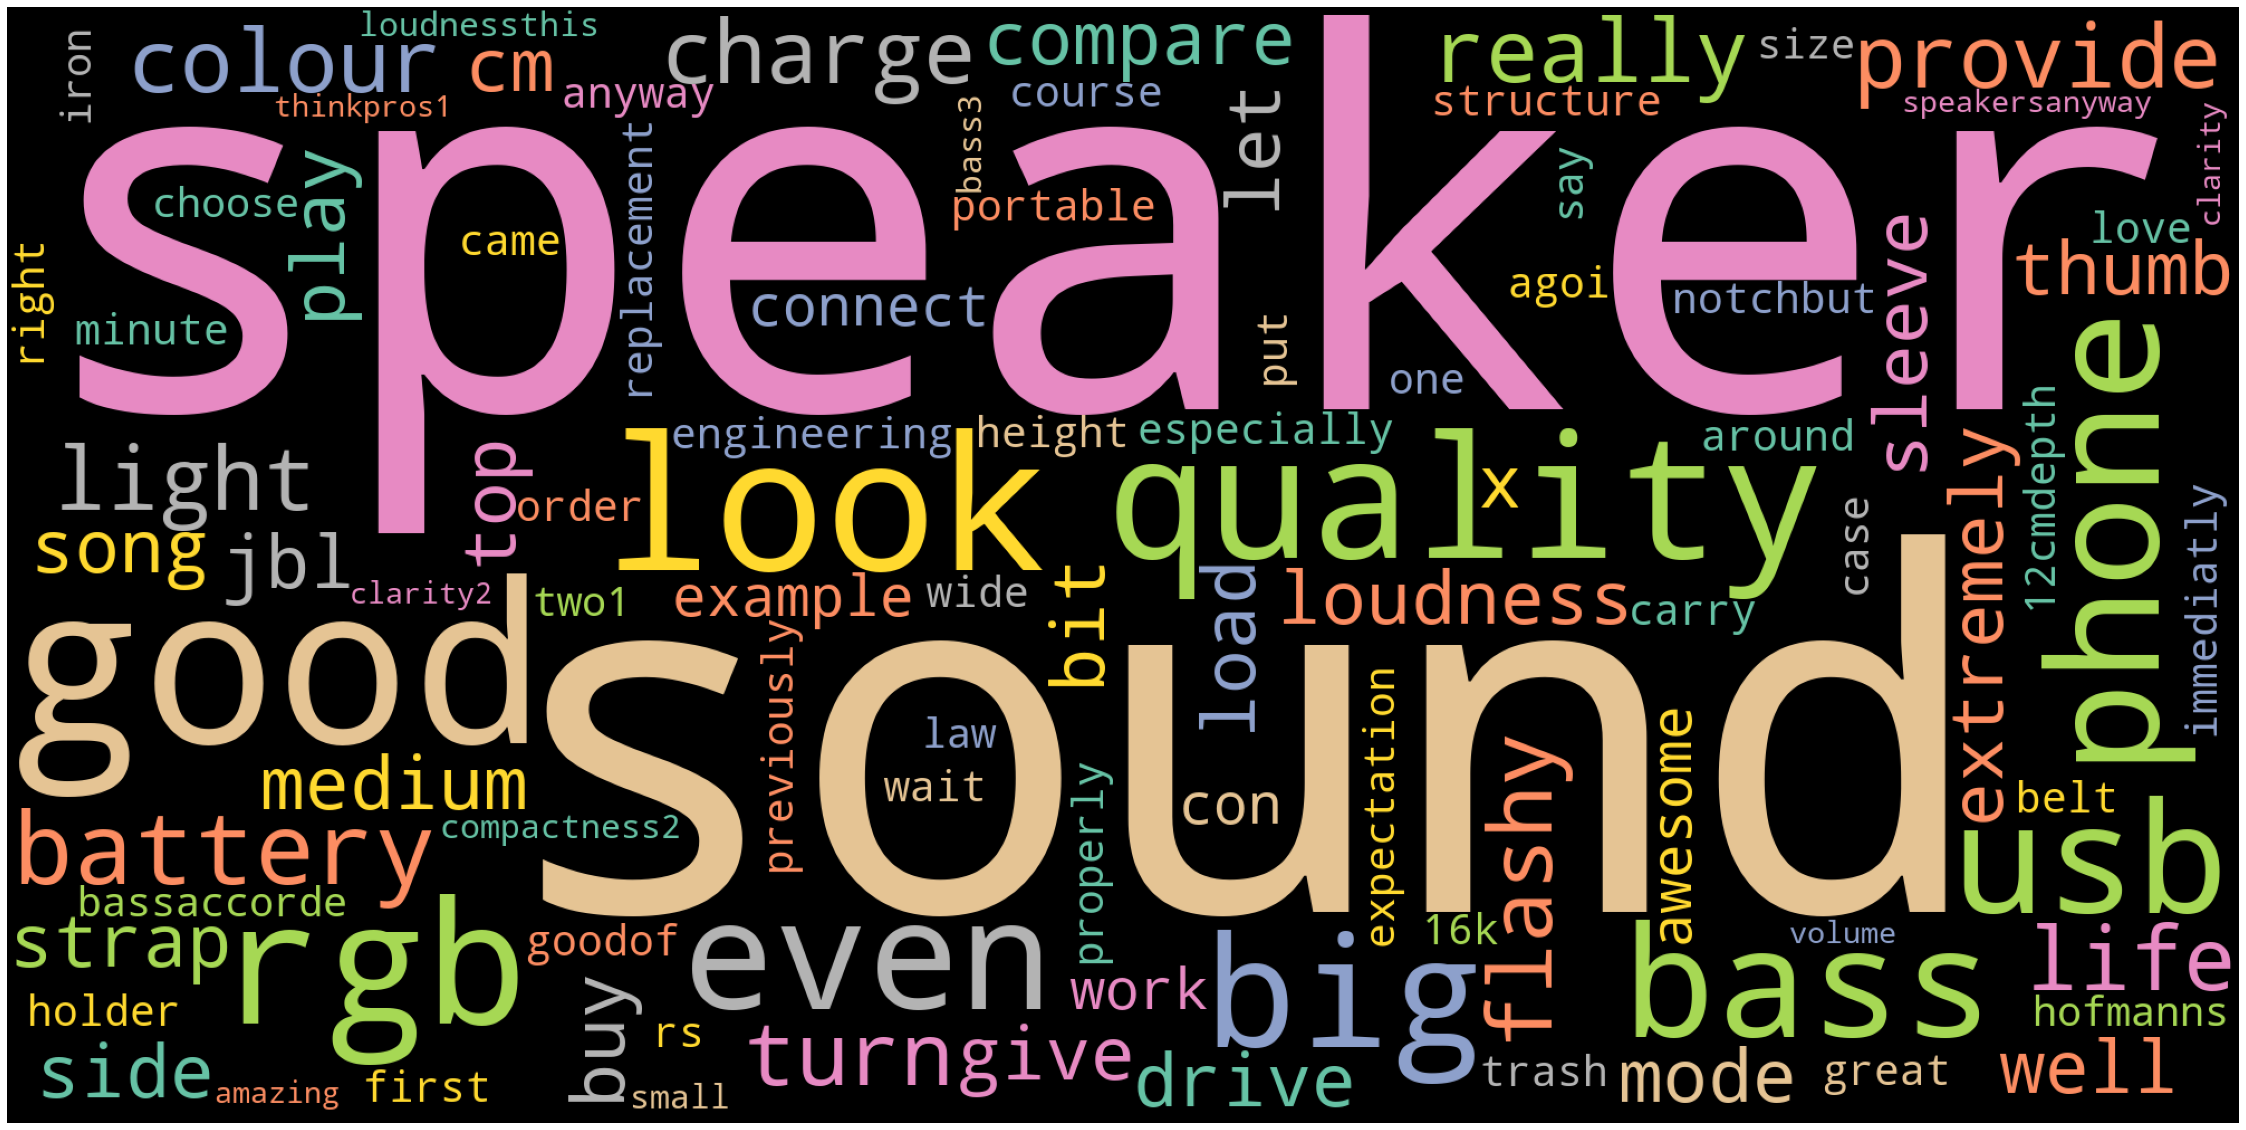

In [ ]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

STOPWORDS.add('Pron')
wordcloud=WordCloud(width=2000,height=1000,background_color='black',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

# **Named Entity Recognition**

In [ ]:
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [ ]:
for token in doc_block[100:200]:
    print(token,token.pos_)

here ADV
thinkpros1 NUM
bass NOUN
clarity NOUN
speaker NOUN
amazing PROPN
bass NOUN
extremely ADV
good ADJ
clarity2 NOUN
sound NOUN
quality NOUN
sound NOUN
quality NOUN
volume NOUN
extremely ADV
good ADJ
14w NOUN
woofer NOUN
tweeter NOUN
be AUX
not PART
exactly ADV
bad ADJ
thing3 ADJ
quality NOUN
strap NOUN
provide VERB
good ADJ
quality NOUN
strap NOUN
provide NOUN
let AUX
even ADV
wear VERB
speaker NOUN
shoulder4 PROPN
usb PROPN
provide VERB
have VERB
usb NOUN
mode NOUN
let VERB
plug PROPN
thumb PROPN
drive NOUN
song NOUN
play VERB
triedthe PROPN
cons1 NOUN
sleeve VERB
tight ADJ
sleeve NOUN
top ADJ
bit NOUN
loose ADJ
glide NOUN
hold VERB
that2 NOUN
no DET
memory NOUN
speaker NOUN
do AUX
not PART
save VERB
setting VERB
for ADP
example NOUN
do AUX
not PART
like VERB
flashy ADJ
rgb PROPN
colour PROPN
turn NOUN
every DET
time NOUN
turn NOUN
speaker NOUN
need VERB
press NOUN
m VERB
key ADJ
second ADJ
turn NOUN
light NOUN
off3 ADV
limited ADJ
light ADJ
colour NOUN
want VERB
constant ADJ
col

In [ ]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['turn', 'time', 'turn', 'speaker', 'need', 'press', 'm', 'turn', 'light', 'colour', 'want', 'colour', 'example', 'lead', 'look', 'usb', 'mode', 'connect', 'phone', 'jack', 'connect', 'phone', 'charge', 'phone', 'charge', 'play', 'song', 'phone', 'require', 'thumb', 'drive', 'work', 'sound', 'card6', 'battery', 'life', 'look', 'battery', 'lot', 'juice', 'work', 'sound', 'look', 'count', 'con', 'list', 'deal', 'people', 'sound', 'quality', 'speaker', 'look', 'connection', 'battery', 'life', 'soso', 'think', 'side', 'sound', 'sound', 'bass', 'optimum', 'lack', 'bit', 'depthsize', 'look', 'color', 'light', 'battery', 'life', 'sound', 'loudness', 'get', 'price', 'medium', 'load']


In [ ]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()


In [ ]:

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,speaker,12
1,sound,11
2,look,6
3,quality,5
4,bass,4
5,phone,4
6,battery,4
7,charge,3
8,provide,3
9,turn,3


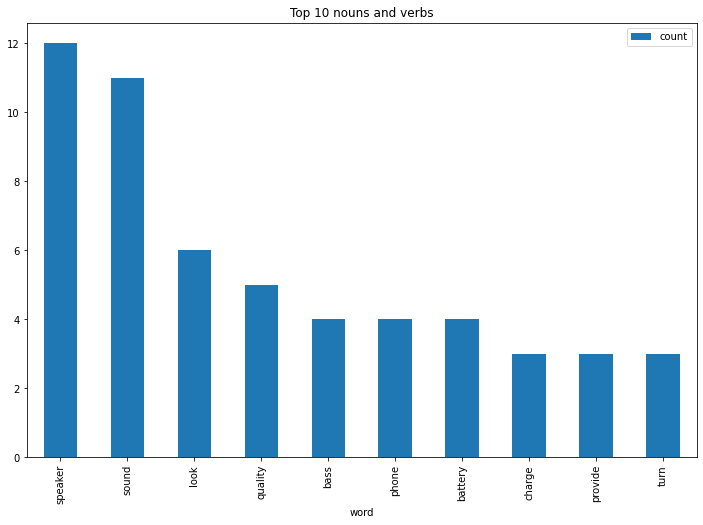

In [ ]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

# **EMOTION MINING**

In [ ]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(review_df))
sentences

['First of all the sound is great.',
 'especially the look.',
 'i just love the rgb and its engineering structure , its top notch.But when i put the belt on it, the right side holder immediatly came off , how can we said it a portable speaker if it can’t be properly carried around😂😂Anyway i have ordered for a replacement.',
 'waiting for it😇 The media could not be loaded.',
 'Just bought it a few minutes ago.I previously bought JBL Charge 5, which was a Rs.',
 '16K trash speaker.',
 'But when I compare that JBL with this speaker, this one is well over my expectation.',
 'This speaker sounds really really good.Of course the bigger the speaker, the better it will sound.',
 'In this case, the speaker is about 12cm (height) x 29cm (wide) x 12cm(depth).',
 "And the speaker has to be bigger to give you more bass.According to Hofmann's iron law, you can choose only two:[1] Size (compactness)[2] Bass[3] LoudnessThis is bigger, so it can give you bass and loudness compared to smaller speakers.A

In [ ]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,First of all the sound is great.
1,especially the look.
2,i just love the rgb and its engineering struct...
3,waiting for it😇 The media could not be loaded.
4,Just bought it a few minutes ago.I previously ...
5,16K trash speaker.
6,"But when I compare that JBL with this speaker,..."
7,This speaker sounds really really good.Of cour...
8,"In this case, the speaker is about 12cm (heigh..."
9,And the speaker has to be bigger to give you m...


In [ ]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [ ]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [ ]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [ ]:
# manual testing
calculate_sentiment(text='super')

3

In [ ]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      3
1      0
2      5
3      0
4      0
5      0
6      0
7      4
8      0
9      2
10     7
11     3
12    -3
13     3
14     0
15    -1
16     1
17     2
18     0
19     3
20     3
21     0
22     0
23     0
24     2
25     3
26    10
27     0
28     0
29    10
Name: sentiment_value, dtype: int64

In [ ]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      7
1      3
2     49
3      9
4     16
5      3
6     16
7     16
8     14
9     43
10    12
11    10
12     9
13    18
14    20
15    18
16     8
17    13
18    22
19    17
20    11
21    19
22    10
23    22
24    14
25    36
26    14
27     5
28     9
29    59
Name: word_count, dtype: int64

In [ ]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
12,14W woofer with tweeters isn't exactly a bad t...,-3,9
15,Sleeve not tight: The sleeve on the top is a b...,-1,18
14,USB Provided: Has USB mode which will let you ...,0,20
28,So I think it's a 5-star from my side.,0,9
22,It can charge your phone if the charge is on.,0,10
23,But you can't even play songs from your phone ...,0,22
18,"Every time I turn the speaker on, I need to pr...",0,22
8,"In this case, the speaker is about 12cm (heigh...",0,14
21,USB Mode doesn't connect to the phone: USB is ...,0,19
6,"But when I compare that JBL with this speaker,...",0,16


In [ ]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    30.000000
mean      1.900000
std       2.986752
min      -3.000000
25%       0.000000
50%       0.500000
75%       3.000000
max      10.000000
Name: sentiment_value, dtype: float64

In [ ]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,First of all the sound is great.,3,7
2,i just love the rgb and its engineering struct...,5,49
7,This speaker sounds really really good.Of cour...,4,16
9,And the speaker has to be bigger to give you m...,2,43
10,Bass and Clarity: The speaker has amazing bass...,7,12
11,Sound Quality: The sound quality and volume ar...,3,10
13,Quality Strap Provided: Good quality strap pro...,3,18
16,No memory: The speaker doesn't save your setti...,1,8
17,"For example, I don't like flashy RGB colours, ...",2,13
19,Limited Light Colours: I wanted some constant ...,3,17


In [ ]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
1,especially the look.,0,3
3,waiting for it😇 The media could not be loaded.,0,9
4,Just bought it a few minutes ago.I previously ...,0,16
5,16K trash speaker.,0,3
6,"But when I compare that JBL with this speaker,...",0,16
8,"In this case, the speaker is about 12cm (heigh...",0,14
12,14W woofer with tweeters isn't exactly a bad t...,-3,9
14,USB Provided: Has USB mode which will let you ...,0,20
15,Sleeve not tight: The sleeve on the top is a b...,-1,18
18,"Every time I turn the speaker on, I need to pr...",0,22


In [ ]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,First of all the sound is great.,3,7,0
1,especially the look.,0,3,1
2,i just love the rgb and its engineering struct...,5,49,2
3,waiting for it😇 The media could not be loaded.,0,9,3
4,Just bought it a few minutes ago.I previously ...,0,16,4
5,16K trash speaker.,0,3,5
6,"But when I compare that JBL with this speaker,...",0,16,6
7,This speaker sounds really really good.Of cour...,4,16,7
8,"In this case, the speaker is about 12cm (heigh...",0,14,8
9,And the speaker has to be bigger to give you m...,2,43,9


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

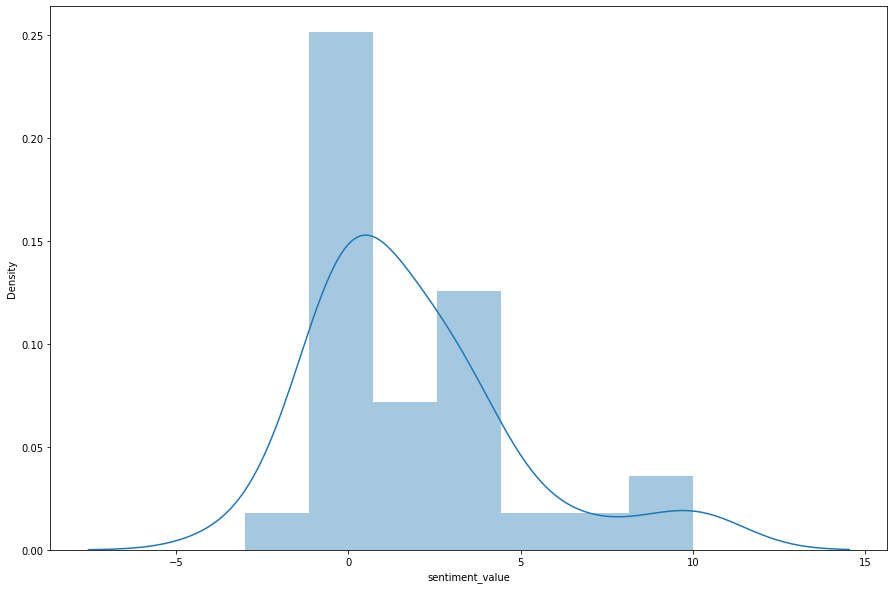

In [ ]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

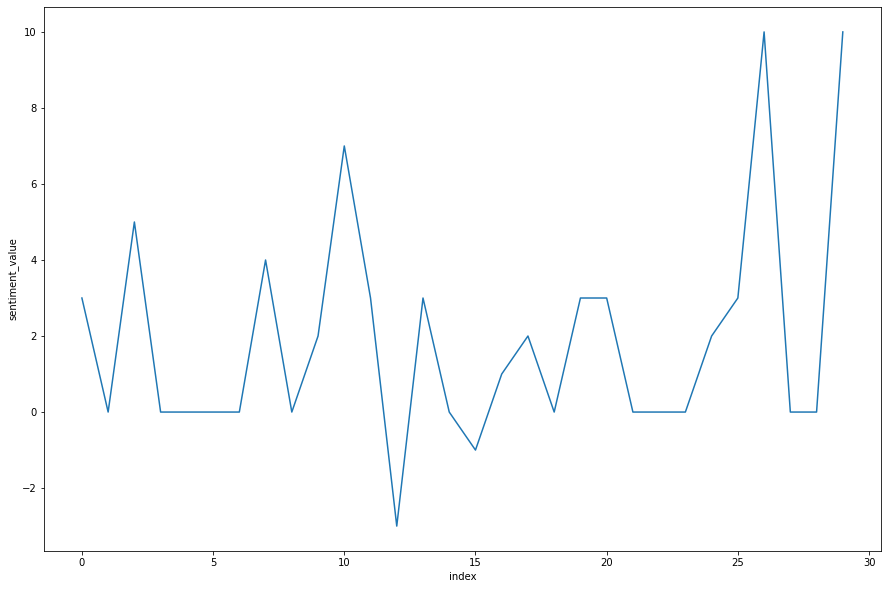

In [ ]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)